In [4]:
cd pad-mounted-switch-analysis/Data


/home/dhruv/pad-mounted-switch-analysis/Data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
df_17 = pd.read_excel('./2017.xlsx', index_col='ID')
df_12 = pd.read_excel('./2012.xlsx', index_col='ID')
df_07 = pd.read_excel('./2007.xlsx', index_col='ID')
df_02 = pd.read_excel('./2002.xlsx', index_col='ID')

# Data Pre-Processing
* We are changing all the strings to numbers so that it's easy for processing.
* 0 - No Defects
* 1 - Minor Defects
* 2 - Moderate Defects
* 3 - Significant Defects
* 4 - Serious Defects

In [6]:
df_17.head(5)

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
ID,,,,,,,,
1,32,0.03,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,3.9
2,56,0.31,Serious Defects,Serious Defects,Serious Defects,Serious Defects,Significant Defects,2.7
3,29,0.02,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,4.0
4,17,0.00,Minor Defects,Minor Defects,Minor Defects,Minor Defects,Minor Defects,4.5
5,15,0.00,Minor Defects,Minor Defects,Minor Defects,Minor Defects,Minor Defects,4.5


In [7]:
df_17.Enclosure.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [8]:
df_17.Terminations.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [9]:
df_17.Blades.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [10]:
df_17['Operating Mechanism'].unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [11]:
df_17.Pad.unique()

array(['Moderate Defects', 'Significant Defects', 'Minor Defects',
       'Serious Defects'], dtype=object)

In [12]:
def replace(df, columnName):
    df[columnName] = [0 if s == 'No Defect' else s for s in df[columnName]] 
    df[columnName] = [1 if s == 'Minor Defects' else s for s in df[columnName]] 
    df[columnName] = [2 if s == 'Moderate Defects' else s for s in df[columnName]] 
    df[columnName] = [3 if s == 'Significant Defects' else s for s in df[columnName]] 
    df[columnName] = [4 if s == 'Serious Defects' else s for s in df[columnName]] 

In [13]:
replace(df_17, 'Enclosure')
replace(df_17, 'Terminations')
replace(df_17, 'Blades')
replace(df_17, 'Operating Mechanism')
replace(df_17, 'Pad')

In [14]:
df_17.head(5)

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
ID,,,,,,,,
1,32,0.03,2,2,2,2,2,3.9
2,56,0.31,4,4,4,4,3,2.7
3,29,0.02,2,2,2,2,2,4.0
4,17,0.00,1,1,1,1,1,4.5
5,15,0.00,1,1,1,1,1,4.5


In [15]:
df_17.corr()

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
Age,1.000000,0.914362,0.919478,0.960665,0.960591,0.941344,0.977661,-0.950191
Infrared Scan Results,0.914362,1.000000,0.700222,0.795586,0.797685,0.747197,0.881450,-0.913542
Enclosure,0.919478,0.700222,1.000000,0.947570,0.945930,0.968142,0.907658,-0.851062
Terminations,0.960665,0.795586,0.947570,1.000000,0.974207,0.967918,0.941048,-0.889483
Blades,0.960591,0.797685,0.945930,0.974207,1.000000,0.964854,0.942370,-0.889769
Operating Mechanism,0.941344,0.747197,0.968142,0.967918,0.964854,1.000000,0.923767,-0.869995
Pad,0.977661,0.881450,0.907658,0.941048,0.942370,0.923767,1.000000,-0.928234
Health Index,-0.950191,-0.913542,-0.851062,-0.889483,-0.889769,-0.869995,-0.928234,1.000000


<AxesSubplot:>

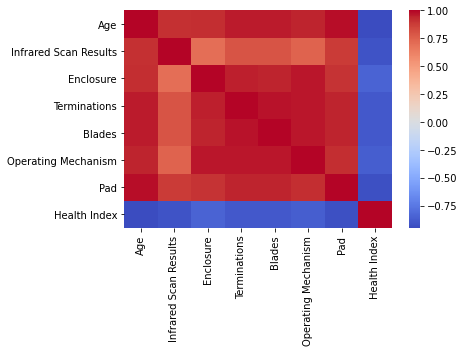

In [16]:
sns.heatmap(df_17.corr(), cmap='coolwarm')

# Sample Model

In [17]:
df_17.columns

Index(['Age', 'Infrared Scan Results', 'Enclosure', 'Terminations', 'Blades',
       'Operating Mechanism', 'Pad', 'Health Index'],
      dtype='object')

In [18]:
X = df_17[['Age', 'Infrared Scan Results', 'Enclosure', 'Terminations', 'Blades',
       'Operating Mechanism', 'Pad']]
y = df_17['Health Index']

In [19]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
linearModel = LR()
linearModel.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad
ID,,,,,,,
702,42,0.09,3,3,3,3,2
995,34,0.04,3,2,2,2,2
351,73,0.88,4,4,4,4,4
987,68,0.70,4,4,4,4,4
410,33,0.04,3,2,2,2,2
...,...,...,...,...,...,...,...
614,74,0.99,4,4,4,4,4
552,72,0.82,4,4,4,4,4
630,61,0.42,4,4,4,4,3


In [22]:
results = linearModel.predict(X_test)

In [23]:
mse = mean_absolute_error(y_test, results)

In [24]:
mse

0.31136081795452836

In [25]:
df_17['Health Index'].describe()

count    1310.000000
mean        2.593664
std         1.418361
min         0.100000
25%         1.400000
50%         2.600000
75%         3.800000
max         5.000000
Name: Health Index, dtype: float64

In [26]:
df_17.Age.describe()

count    1310.000000
mean       47.274046
std        21.143090
min        15.000000
25%        25.000000
50%        51.000000
75%        68.000000
max        74.000000
Name: Age, dtype: float64

/home/dhruv/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Health Index Distribution w.r.t. Age ')

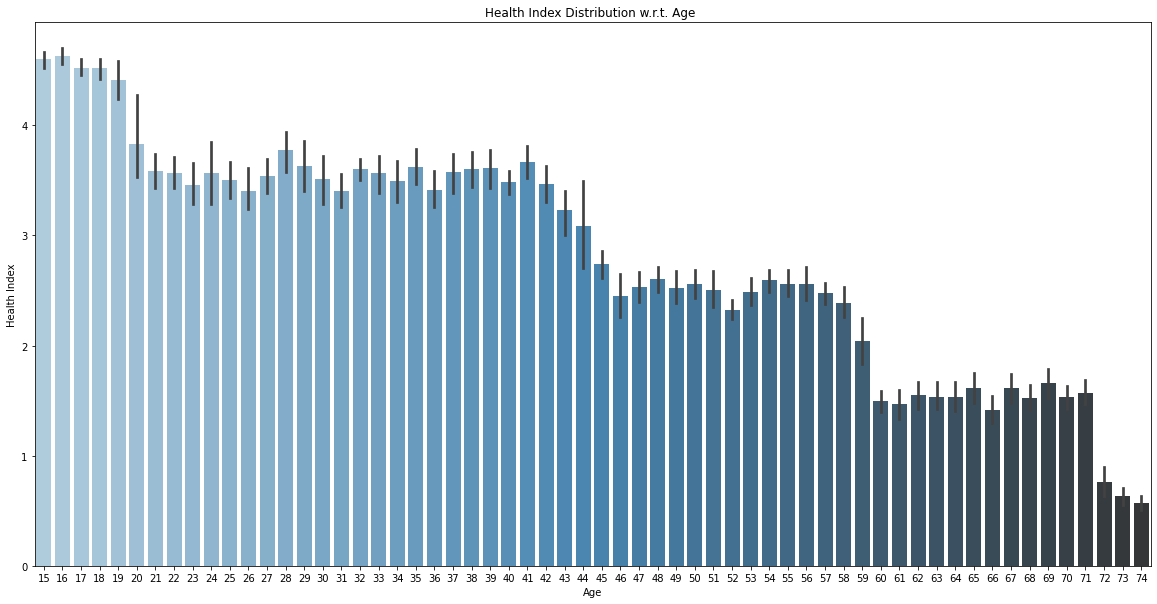

In [88]:
plt.figure(figsize=(20,10))
#sns.set_theme('darkgrid')
sns.barplot(df_17.Age,df_17['Health Index'],color='violet',palette="Blues_d")
plt.xlabel('Age')
plt.ylabel('Health Index')
plt.title('Health Index Distribution w.r.t. Age ')

Text(0.5, 1.0, 'Age Histogram for 2017')

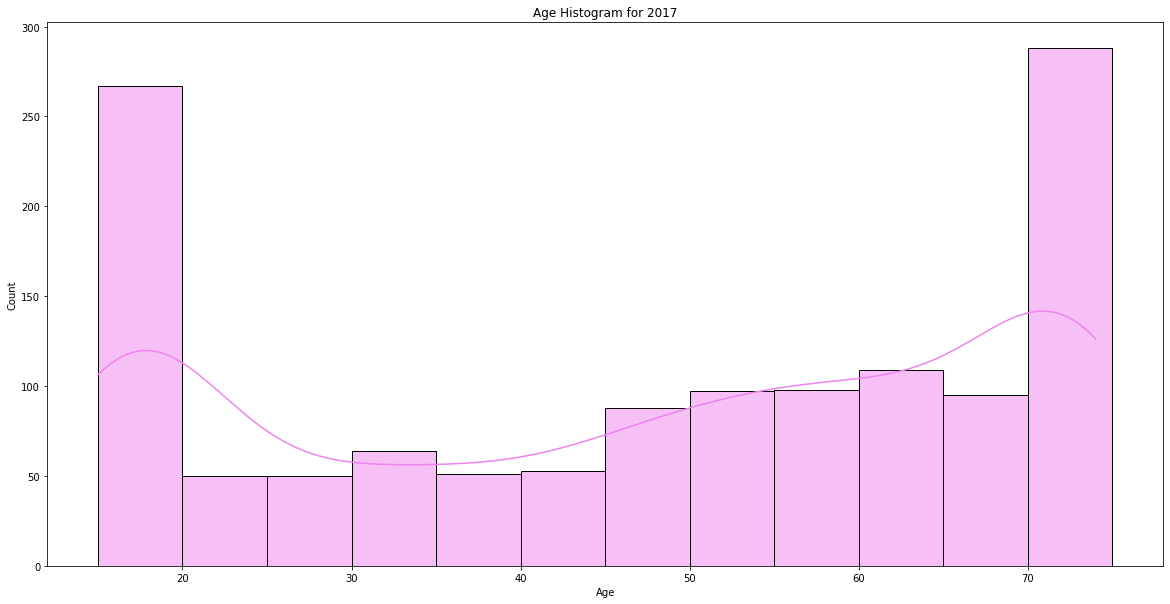

In [95]:
plt.figure(figsize=(20,10))

sns.histplot(x=df_17.Age,color='violet',kde=True,binwidth=5,data=df_17)
plt.xlabel('Age')
plt.title('Age Histogram for 2017')

Text(0.5, 1.0, 'Health Index Distribution for 2017')

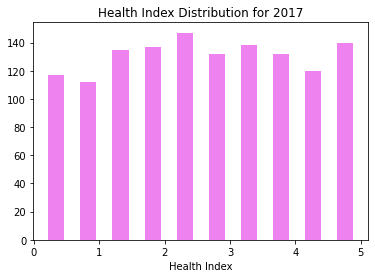

In [50]:
plt.hist(df_17['Health Index'],color='violet',rwidth=0.5)
plt.xlabel('Health Index')
plt.title('Health Index Distribution for 2017')

<AxesSubplot:xlabel='Age', ylabel='Health Index'>

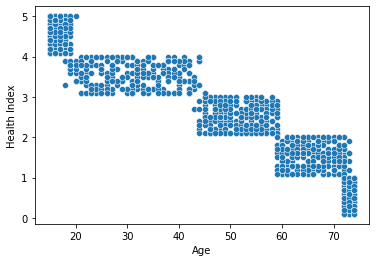

In [62]:
sns.scatterplot(x=df_17.Age,y=df_17['Health Index'])

<AxesSubplot:xlabel='Enclosure', ylabel='Health Index'>

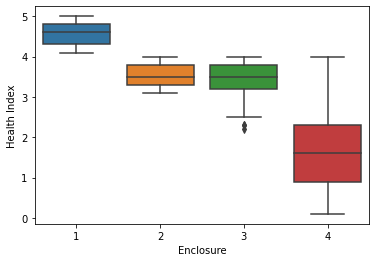

In [31]:
sns.boxplot(x=df_17.Enclosure,y=df_17['Health Index'])

<AxesSubplot:xlabel='Infrared Scan Results', ylabel='Health Index'>

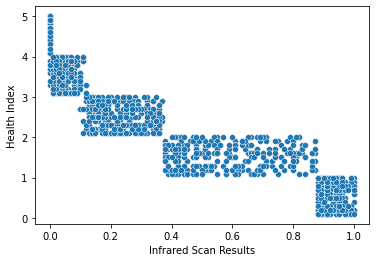

In [32]:
sns.scatterplot(x=df_17['Infrared Scan Results'],y=df_17['Health Index'])

In [33]:
df_17.columns

Index(['Age', 'Infrared Scan Results', 'Enclosure', 'Terminations', 'Blades',
       'Operating Mechanism', 'Pad', 'Health Index'],
      dtype='object')

<AxesSubplot:xlabel='Terminations', ylabel='Health Index'>

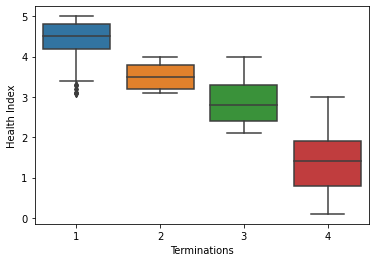

In [34]:
sns.boxplot(x=df_17.Terminations,y=df_17['Health Index'])

<AxesSubplot:xlabel='Blades', ylabel='Health Index'>

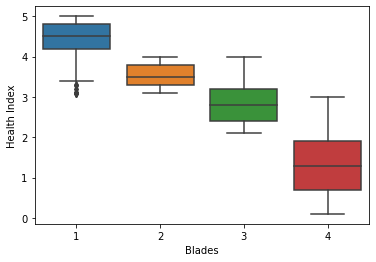

In [35]:
sns.boxplot(x=df_17.Blades,y=df_17['Health Index'])

<AxesSubplot:xlabel='Pad', ylabel='Health Index'>

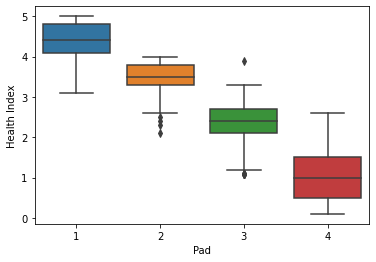

In [36]:
sns.boxplot(x=df_17.Pad,y=df_17['Health Index'])

<AxesSubplot:xlabel='Operating Mechanism', ylabel='Health Index'>

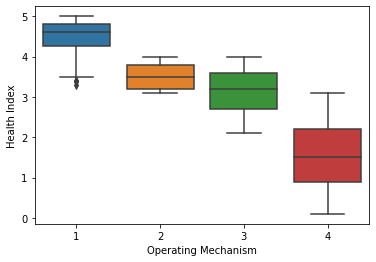

In [37]:
sns.boxplot(x=df_17['Operating Mechanism'],y=df_17['Health Index'])